# Diabetes Prediction CSC 2621 Final Project


### Group Members:
###### Oliver Grudzinski
###### Pranaav Paladugu
###### Alec Weinbender

## Research Question

With this project, we are attempting to see whether we can diagnostically predict whether or not a patient has diabetes, based on the data given to us in the dataset.

## Hypotheses

#### Hypotheses Statements:

Null Hypothesis Example - A given variable does not influence whether a patient may have diabetes.

Alternative Hypothesis Example - A given variable does influence whether a patient may have diabetes.

Examples:

H0 (Glucose) – Glucose levels do not influence whether a patient may have diabetes.
HA (Glucose) – Glucose levels do have an influence on whether a patient may have diabetes.

H0 (BMI) – The patient’s BMI does not influence whether a patient may have diabetes.
HA (BMI) – The patient’s BMI does influence on whether a patient may have diabetes.

H0 (Age) – The patient’s age does not influence whether a patient may have diabetes.
HA (Age) – The patient’s age does influence on whether a patient may have diabetes.

H0 (Diabetes Pedigree Function) – The patient’s DPF levels do not influence whether a patient may have diabetes.
HA (Diabetes Pedigree Function) – The patient’s DPF levels do have an influence on whether a patient may have diabetes.

In [1]:
from scipy.stats import stats
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

df = pd.read_csv("data/diabetes.csv")

Outcome = df["Outcome"]

columns_list = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
Correction = True
length3 = len(df)
count = 0
threshold = (0.05)/8
ColumnsLength = len(df.columns)
Dict = {}
var = []
pval = []
Dict = {"Variable":[], "T-stat": [], "P-value": [], "Correction":[]}
for variable in columns_list:
        samples_by_group = []
        for value in set(df[variable]):
            mask = df[variable] == value
            samples_by_group.append(df['Outcome'][mask])
        kstat, Kp = stats.kruskal(*samples_by_group)
        if(Kp < ((threshold)/length3)):
            Correction = True
        elif(Kp > ((threshold)/length3)):
            Correction = False
        Dict["T-stat"].append(kstat)
        Dict["P-value"].append(Kp)
        pval.append(Kp)
        var.append(variable)
        Dict["Correction"].append(Correction)
        Dict["Variable"].append(variable)

table = pd.DataFrame(Dict)

sorted_df = table.sort_values(by=['P-value'], ascending=True)

sorted_df.head(10)

C:\Users\paladugup\AppData\Local\Temp\ipykernel_8560\759480337.py:26: DeprecationWarning: Please import `kruskal` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  kstat, Kp = stats.kruskal(*samples_by_group)


,Variable,T-stat,P-value,Correction
1,Glucose,269.382027,5.586210e-11,True
7,Age,140.754007,2.450833e-10,True
0,Pregnancies,64.510701,8.940856e-08,True
3,SkinThickness,73.467109,1.699207e-02,False
4,Insulin,227.473254,1.818808e-02,False
5,BMI,286.097245,4.422738e-02,False
2,BloodPressure,54.862435,1.738525e-01,False
6,DiabetesPedigreeFunction,532.330054,3.002203e-01,False


## Dataset

#### Explanation of the Dataset:

This dataset was created to do what we are doing, which is to diagnostically predict whether or not a patient has diabetes. All of the data in this dataset is taken from female patients that are at least 21 years old and of Pima Indian heritage.

#### Description of Features:
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: patient's (years)

#### Target Variable:
The target variable is Outcomes:

Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

## Data Analysis and Visualization

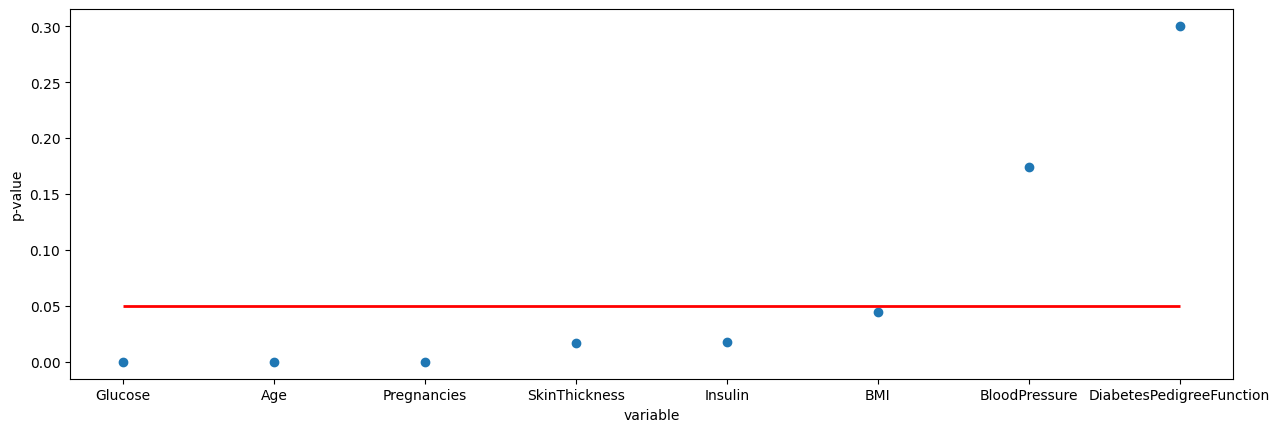

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(sorted_df['Variable'])
y = np.array(sorted_df['P-value'])

f = plt.figure()
f.set_figwidth(15)

plt.xlabel('variable')
plt.ylabel('p-value')

plt.scatter(x, y)
plt.hlines(y=0.05, xmin=0, xmax=7, linewidth=2, color='r')
plt.show()

## Data Modeling and Prediction

## Results Analysis